**Вежба за Глава 4 - Авто-енкодери**

Кодот е изваден и адаптиран од www.tensorflow.org.

Ги вчитуваме потребните библиотеки.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

**Податочно множество**

Во првите примери ќе се користи Fashion MNIST податочното множество. Сликите во податочното множество се со големина од 28x28 пиксели.

Податочното множество може да го вчитаме со следниве наредби:

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


Во продолжение е прикажано како може да ги прикажеме првите 10 слики од податочното множество.

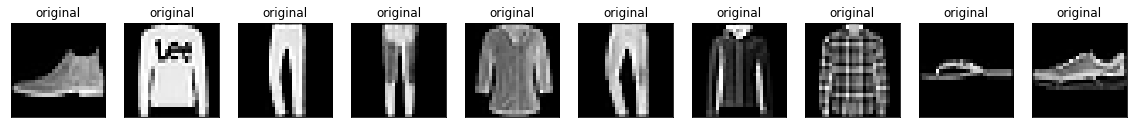

In [3]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

**Пример 1: Компресија на слики со користење на основен автоенкодер**

Во овој пример се користи основен авто-енкодер со два Dense слоеви. 
Со енкодерот се прави компресија на сликите во вектор со димензија 64 (тоа е латентната димензија), а со декодерот се прави реконструкција на оригиналната слика.
Променливата latent_dim ја поставуваме на 64, односно тоа е големината на векторот во латентниот простор кој сакаме да го добиеме на излез од енкодерот.

Креираме класа Autoencoder каде се дефинираат енкодер и декодер слоевите.
За секој слој се специфицира потребната големината на излезот, тоа е 64 (односно латентната димензија) на излез од енкодер слојот и 784 за излезот на декодер слојот. Излезниот вектор од декодер слојот кој е со големина 784 потоа се конвертира во слика со димензии 28x28, односно со големина иста како оригиналните слики.

Во овој пример, кај енкодер слојот се користи ReLU активациска функција, додека во декодер слојот се користи логистичка односно сигмуидална функција.




In [4]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim) 

Специфицираме дека ќе се користи Adam оптимизатор. 
За процена на загубата на информации специфицираме дека сакаме да се користи средната квадратна грешка.

In [5]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Моделот се тренира со користење на fit функцијата, каде x_train се проследува како влезно и излезно множество.

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0237 - val_loss: 0.0133
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0117 - val_loss: 0.0107
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0096 - val_loss: 0.0096
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0090 - val_loss: 0.0092
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.008

Откако ќе се истренира мрежата, потоа може да ја тестираме истата.

In [7]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

На крај, за првите 10 слики од податочното множество ќе ги прикажеме оригиналната слика (која се дава на влез на авто-енкодерот) и реконструираната слика (која се добива на излез од авто-енкодерот).

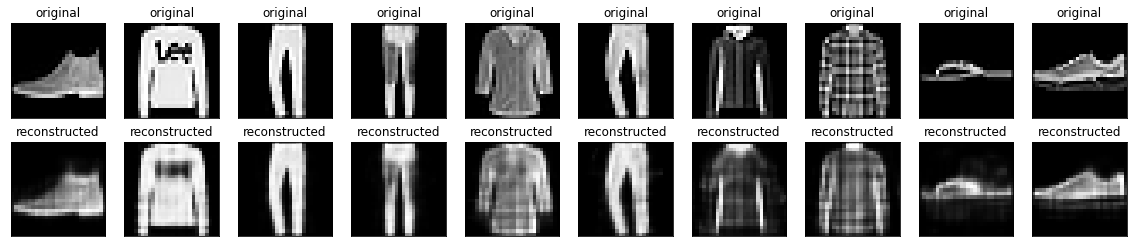

In [8]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

**Пример 2: Отстранување на шум со користење на конволуциски авто-енкодер**

Авто-енкодерите можат да се користат на отстранување на шум.
Ова се базира на фактот дека нема корелации помеѓу шумот (тој е случаен), и со авто-енкодерот се откриваат само важните зависности кои постојат отфрлајќи ги случајните кои се резултат на шум.

Ќе креираме податочно множество добиено од Fashion MNIST податочното множество со додавање на шум во секоја слика. Потоа, авто-енкодерот нема да се тренира со оригиналните слики туку со сликите со шум, а таргет (цел) ќе биде оригиналната слика.

За таа цел прво го вчитуваме Fashion MNIST податочното множество.

In [9]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Потоа додаваме шум во податоците.

In [10]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

Добиените слики (сликите со шум) може да ги погледнеме со:

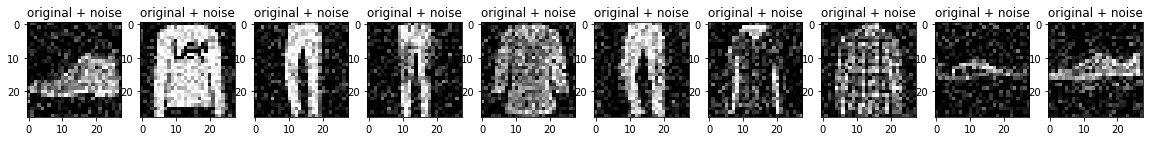

In [11]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

Следно, ќе креираме конволуциски авто-енкодер. Во овој пример користиме конволуциски авто-енкодер со Conv2D слоеви во енкодер делот, и Conv2DTranspose и Conv2D слоеви во декодер делот.

Креираме класа Denoise каде специфицираме кои слоеви ќе ги имаме во енкодер и декодер делот.

Во енкодер делот креираме два Conv2D слоеви со кои правиме компресија на сликата со димензии 28x28 во слика со димензии 7x7.

Во декодер делот имаме два Conv2DTranspose слоеви и еден Conv2D слој. Со декодер слојот компресираната слика ја реконструираме во слика со димензии како влезната слика односно 28x28.

Во овој пример, само кај последниот слој користиме сигмоидална активациска функција, а кај останатите слоеви се користи ReLU активациска функција.


In [12]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

Специфицираме дека ќе се користи Adam оптимизатор. За процена на загубата на информации специфицираме дека сакаме да се користи средната квадратна грешка.

In [13]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

При тренирање на мрежата, множеството со шум го поставуваме како тренинг множество, додека влезното множество се поставува како таргет.

In [14]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.0157 - val_loss: 0.0098
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0090 - val_loss: 0.0086
Epoch 3/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0076 - val_loss: 0.0073
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0069 - val_loss: 0.0068
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 8/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 9/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 10/10
1875/1875 [==============================] - 60s 32m

Во продолжение ќе погледнеме какви се енкодер и декодер деловите.

Енкодерот ќе научи да ги компресира податоците од димензија 784 во димензија 7x7 во латентниот простор, а декодерот ќе научи да ги реконструира оригиналните слики.

Во продолжение е прикажно што се дава на влез и што се добива на излез од секој слој, односно може да се види големината на сликите што се добиваат на излез од секој слој.


In [15]:
autoencoder.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [16]:
autoencoder.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


Откако ќе се истренира мрежата, потоа може да ја тестираме истата.


In [17]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

На крај, за првите 10 слики од податочното множество ќе ги прикажеме влезната слика која се дава на влез на авто-енкодерот (тоа е сликата со шум) и реконструираната слика која се добива на излез од авто-енкодерот (тоа е сликата со отстранет шум).

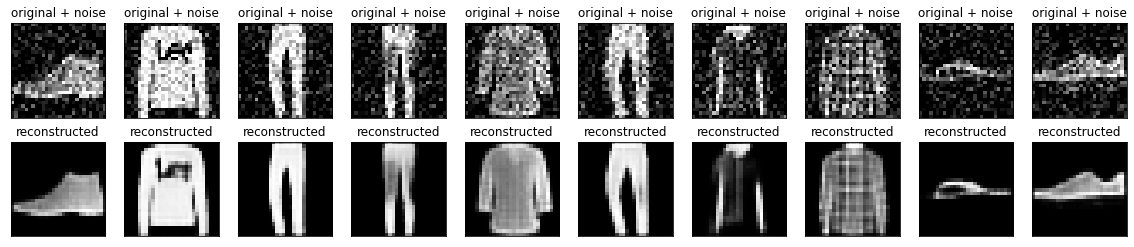

In [18]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

**Пример 3: Детекција на аномалии со авто-енкодер**

Во овој пример ќе се користи ECG5000 податочното множество кое е достапно на http://www.timeseriesclassification.com/description.php?Dataset=ECG5000.

Ова податочно множество содржи 5000 примероци за електрокардиограми (ЕКГ). Секој примерок претставува временска серија со 140 последователни вредности во ЕКГ сигналот.

Ќе користиме поедноставена верзија на ова податочно множество каде секој примерок е лабелиран со една од следниве две класи: класа 0 која одговара на абнормален срцев ритам и класа 1 која одговара на нормален срцев ритам.

Иако ова податочно множество е лабелирано и може да се користи за решавање на проблеми со надгледувано учење, ние ќе го користиме за да детектираме кои ЕКГ сигнали се со аномалии.

Авто-енкодерот ќе се тренира со користење само на ЕКГ сигналите со нормален ритам и ќе се користи за реконструкција на сите примероци. Детекцијата на аномалии се базира на претпоставката дека кај примероците со аномалии ќе има повисока грешка при реконструкција на примерокот. 
Може да се дефинира одреден праг, и сите примероци за кои грешката е над тој праг може да се детектираат како аномалии.

Целта е со овој пример да илустрираме на кој начин може да се прави детекција на аномалии во рамки на примероци од податочно множество каде имаме голем број на ЕКГ сигнали со нормален срцев ритами и мал број примероци со абнормален срцев ритам.

Податочното множество може да се превземе и вчита со следниве наредби:

In [19]:
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,...,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,...,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,...,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,-0.674995,...,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,-0.983242,...,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.

Потоа го делиме податочното множество на трениниг и тест множество.

Последната колона во податочното множество се однесува на класната лабела, додека останатите колони се однесуваат на вредностите во временската серија на дадениот ЕКГ примерок.

In [20]:
labels = raw_data[:, -1]
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

Следно, се прави нормализација на вредностите со цел сите вредности во тренинг множеството да се доведат во интервалот [0,1].

In [21]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

Бидејќи авто-енкодерот треба да се тренира само со користење на примероците со нормален ритам (од класа 1), затоа следно се прави поделба според типот на ритам.

In [22]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

Со следниве наредби може да ги прикажеме првиот нормален и абнормален примерок од тренинг множеството:

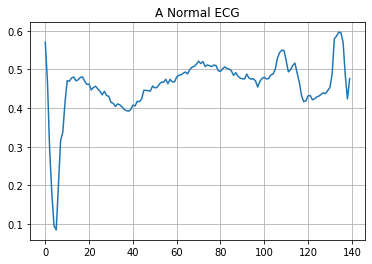

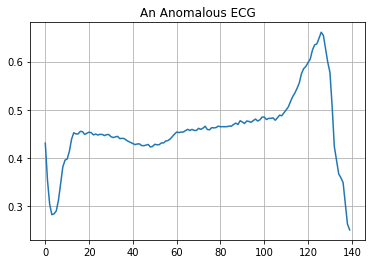

In [23]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

Следно, ќе креираме авто-енкодер со три Dense слоеви во енкодер делот, и три Dense слоеви во декодер делот.

Креираме класа AnomalyDetector каде специфицираме кои слоеви ќе ги имаме во енкодер и декодер делот.

Во енкодер делот креираме три Dense слоеви со кои правиме компресија на сигналот од вектор со должина 140 во вектор со должина 32, потоа во вектор со должина 16 и на крај компресија во вектор со должина 8.

Во декодер делот симетрично правиме пресликување на слоевите.

Со декодер слојот компресираниот сигнал го реконструираме во сигнал претставен со вектор со должина 140, исто како влезниот сигнал.

Во овој пример, само кај последниот слој користиме сигмоидална активациска функција, а кај останатите слоеви се користи ReLU активациска функција.



In [24]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

Специфицираме дека ќе се користи Adam оптимизатор.

За процена на загубата на информации специфицираме дека сакаме да се користи средната апсолутна грешка (Mean Absolute Error - MAE).

In [25]:
autoencoder.compile(optimizer='adam', loss='mae')

При тренирање на мрежата специфицираме дека за тренирање се користи само делот од тренинг множеството со нормални примероци, додека за тестирање се користи целокупното тест множество.

In [26]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 1s 44ms/step - loss: 0.0576 - val_loss: 0.0526
Epoch 2/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0542 - val_loss: 0.0503
Epoch 3/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0499 - val_loss: 0.0485
Epoch 4/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0456 - val_loss: 0.0465
Epoch 5/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0416 - val_loss: 0.0439
Epoch 6/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0378 - val_loss: 0.0423
Epoch 7/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0346 - val_loss: 0.0407
Epoch 8/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0320 - val_loss: 0.0397
Epoch 9/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0300 - val_loss: 0.0386
Epoch 10/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0283 - val_loss: 0.0378
Epoch 11/20
5/5 [============

Во продолжение ќе ја погледнеме loss функцијата ако за тестирање се користи тренинг или тест множеството.

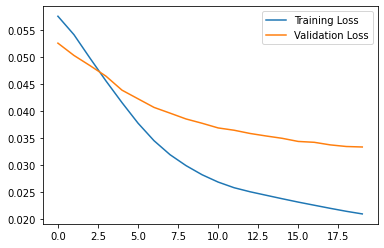

In [27]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

Следно ќе видиме на кој начин може да ги разликуваме примероците со нормален и абнормален срцев ритам.

Прво ќе прикажеме пример за тоа која е разликата помеѓу оригиналниот и реконструираниот сигнал за примерок со нормален и абнормален ритам.

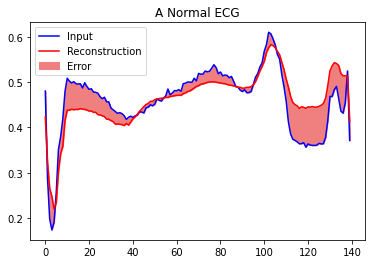

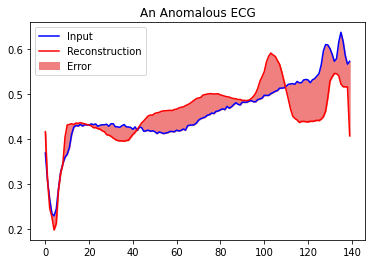

In [28]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.title("A Normal ECG")
plt.show()

encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.title("An Anomalous ECG")
plt.show()

Врз основа на грешката при реконструкција на сигналот може да одлучуваме дали се работи за нормален или абнормален ритам. За таа цел ќе дефинираме праг, и сите примероци кај кои грешката е над тој праг ќе се детектираат како аномалии.

Во продолжение ќе ја погледнеме грешката при реконструкција на нормалните сигнали од тренининг множеството и абнормалните сигнали од тест множеството.

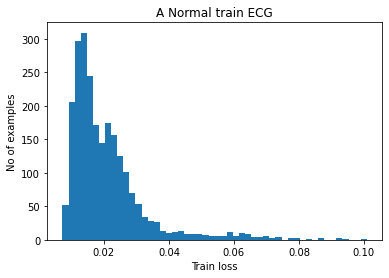

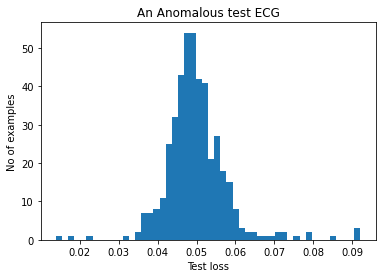

In [29]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.title("A Normal train ECG")
plt.show()

reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.title("An Anomalous test ECG")
plt.show()

Вредноста на прагот ќе ја дефинираме како mean(train_loss)+std(train_loss). Прагот може да го пресметаме со следниве наредби:


In [30]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.032797445


Со ова за вредноста на прагот се добива вредност 0.032797445. Може да забележиме дека повеќето абнормални примероци од тест множеството се реконструирани со грешка над овој праг.

Може да се прават експерименти со користење на различни вредности за прагот и да се избере моделот со највисока точност.

Може да се користат и други стратегии за избор на вредноста на прагот. Кој пристап е најсоодветен пред се зависи од конкретното податочно множество за кое сакаме да правиме детекција на аномалии.

Во продолжение ќе погледнеме како може да се прави предвидување за нови примероци.

In [31]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

preds = predict(autoencoder, test_data, threshold)

Потоа може да погледнеме различни евалуациски мерки за добиениот модел како класификациска точност, прецизност и одѕив.


In [32]:
def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))
  
print_stats(preds, test_labels)

Accuracy = 0.943
Precision = 0.9921722113502935
Recall = 0.9053571428571429


Од резултатите може да заклучиме дека со моделот успешно се врши детекција на аномалии. 

Класификациската точност е доста висока, односно со добиениот модел успешно може да се детектираат 94.3% од абнормалните ЕКГ сигнали во тест множеството.

Помеѓу примероците кои се препознаени како аномалии речиси сите навистина претставуваат абнормални примероци (затоа има висока прецизност). 

Вредноста на одѕивот од 90.54% укажува на тоа дека може малку да се спушти прагот со цел поуспешно да успее моделот да препознае и од останатите абнормални примероци кои не се препознаени како аномалии со користење на оваа вредност за прагот.